In [1]:
import pandas as pd

# Load my dataset
df = pd.read_csv(r'C:\Users\user\Desktop\Customer-Churn-Records.csv')

# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [2]:
# Display the first few rows to check the structure of the data
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2 

In [3]:
# Drop irrelevant columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_cleaned = df.drop(columns=columns_to_drop)

In [4]:
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
#  Check for missing values
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [6]:
#  Check for duplicates
print("\nNumber of duplicate rows: ", df_cleaned.duplicated().sum())


Number of duplicate rows:  0


In [7]:
# Create age group bins
bins = [15, 30, 40, 50, 60, 70, 100]
labels = ['15-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)


In [8]:
# Create balance to estimated salary ratio feature
df_cleaned['BalanceSalaryRatio'] = df_cleaned['Balance'] / df_cleaned['EstimatedSalary']


In [9]:
# Create credit score bins
df_cleaned['CreditScoreBucket'] = pd.cut(df_cleaned['CreditScore'], bins=[300, 500, 700, 850], labels=['Low', 'Medium', 'High'])


In [10]:
# Create tenure categories
df_cleaned['TenureCategory'] = pd.cut(df_cleaned['Tenure'], bins=[0, 3, 7, 10], labels=['Short-Term', 'Mid-Term', 'Long-Term'], right=False)


In [11]:
# Interaction between number of products and credit card ownership
df_cleaned['Products_CrCard_Interaction'] = df_cleaned['NumOfProducts'] * df_cleaned['HasCrCard']


In [12]:
# Create a loyalty indicator feature
df_cleaned['LoyaltyIndicator'] = (df_cleaned['Tenure'] > 5) & (df_cleaned['IsActiveMember'] == 1)


In [13]:
# Categorize Satisfaction Score
df_cleaned['SatisfactionCategory'] = pd.cut(df_cleaned['Satisfaction Score'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])


In [14]:
# One-hot encoding for categorical features
df_cleaned = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender', 'Card Type', 'CreditScoreBucket', 'AgeGroup', 'TenureCategory', 'SatisfactionCategory'], drop_first=True)


In [15]:
# Example: Creating a feature based on inactivity or complaints
df_cleaned['RecentComplaint_Inactive'] = (df_cleaned['Complain'] == 1) & (df_cleaned['IsActiveMember'] == 0)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'BalanceSalaryRatio']
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


# Data Visualization:
Utilize data visualization techniques to gain insights into your dataset.
Create visualizations that reveal patterns and relationships, aiding your understanding of the data

In [17]:
df_cleaned.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,AgeGroup_70+,TenureCategory_Mid-Term,TenureCategory_Long-Term,SatisfactionCategory_Medium,SatisfactionCategory_High,RecentComplaint_Inactive
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1,...,False,True,False,False,False,False,False,False,False,False
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,1,...,False,True,False,False,False,False,False,True,False,False
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,...,False,True,False,False,False,False,True,True,False,True
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,...,True,False,False,False,False,False,False,False,True,False
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,...,False,True,False,False,False,False,False,False,True,False


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


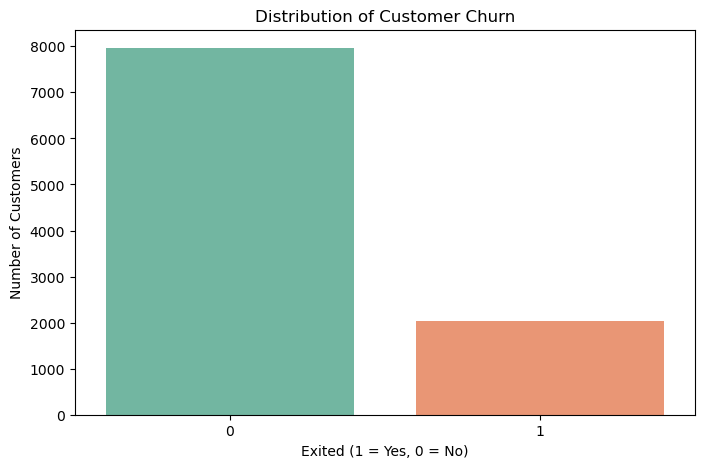

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Exited', palette='Set2')
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()


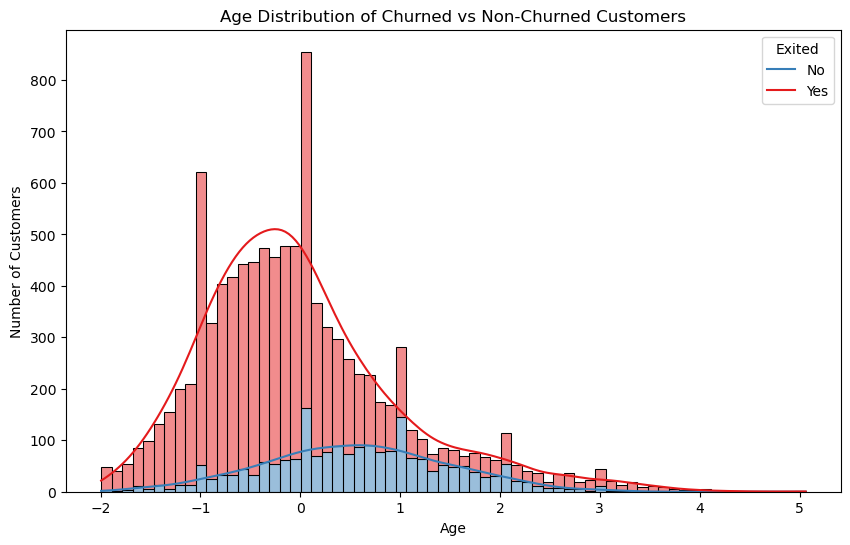

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', hue='Exited', multiple='stack', kde=True, palette='Set1')
plt.title('Age Distribution of Churned vs Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


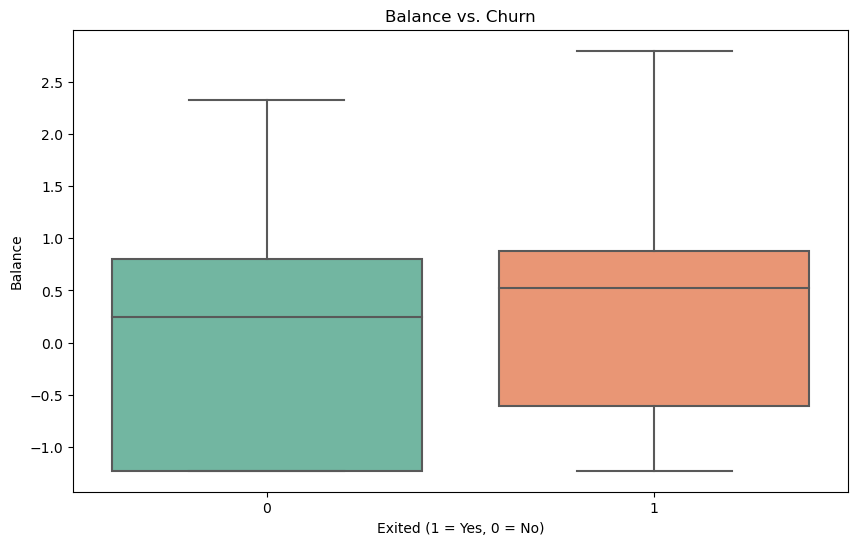

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Exited', y='Balance', palette='Set2')
plt.title('Balance vs. Churn')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Balance')
plt.show()


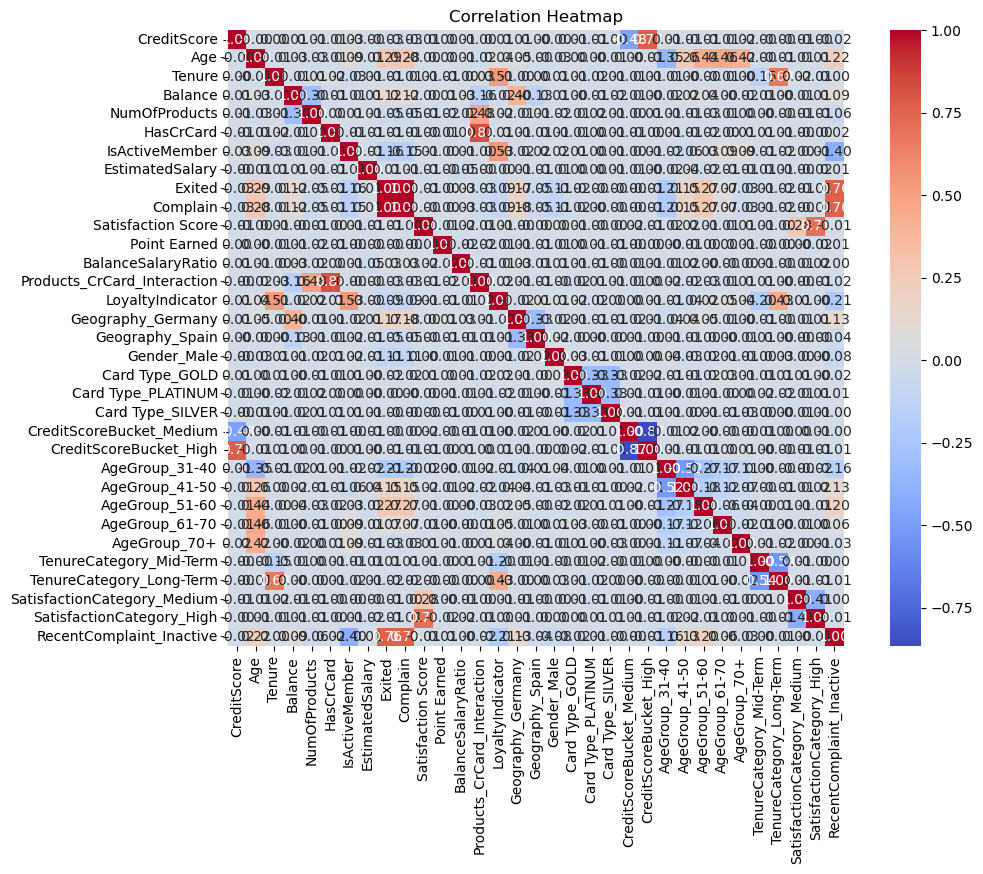

In [31]:
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset (example assumes you've loaded it into 'data')
# data = pd.read_csv('your_data.csv')

# Preprocessing: Dropping irrelevant columns like CustomerId, Surname, and RowNumber
X = df_cleaned.drop(['Exited'], axis=1)
y = df_cleaned['Exited']  # Target variable

# Encoding categorical variables (e.g., Geography, Gender)
#X = pd.get_dummies(X, drop_first=True)  # This avoids multicollinearity

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



In [19]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [21]:
# Predictions
y_pred = model.predict(X_test)



In [22]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1606    1]
 [   1  392]]


## Performance Metrics:

### Accuracy:

0.999 means your model correctly predicts 99.9% of the instances in the test set, which is outstanding.
Classification Report:

### Precision:
For class 0 (not exited): 1.00 (100% of predicted non-churn customers were correct).
For class 1 (exited): 1.00 (100% of predicted churn customers were correct).
Recall:
For class 0: 1.00 (the model identified 100% of actual non-churn customers).
For class 1: 1.00 (the model identified 100% of actual churn customers).
F1-Score:
Both classes have an F1 score of 1.00, indicating a perfect balance between precision and recall.

### Confusion Matrix:


[[1606    1]

 [   1  392]]
 
The confusion matrix shows:

True Negatives (TN): 1606 (non-churn customers correctly predicted as non-churn).
False Positives (FP): 1 (a non-churn customer incorrectly predicted as churn).
False Negatives (FN): 1 (a churn customer incorrectly predicted as non-churn).
True Positives (TP): 392 (churn customers correctly predicted as churn).
Considerations:
While your model performs exceptionally well, a few points should be considered:

Potential Overfitting: The very high accuracy and perfect precision/recall might indicate overfitting, especially if the dataset is imbalanced. If your dataset has many more non-churn than churn customers, the model may not generalize well to unseen data.

Cross-Validation: To ensure that your model is robust, consider using cross-validation. This will give you a better idea of how the model performs on different subsets of the data.

Evaluate with AUC-ROC: Plotting the ROC curve and calculating the AUC (Area Under Curve) can help you assess how well the model discriminates between the two classes.

Check for Class Imbalance: If there is a significant imbalance between churned and non-churned customers, techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help improve the model's performance on the minority class.

Feature Importance: Assessing which features contribute most to your predictions can provide insights into customer behavior and aid in business strategies.

### Bank Customer Churn Dataset

### Project Overview: Bank Customer Churn Prediction

#### Project Motivation
The banking industry faces significant challenges due to customer churn, which refers to the loss of customers over time. As a finance and banking graduate, I have a keen interest in understanding customer behavior and implementing strategies to retain customers. The motivation behind this project is to leverage machine learning to predict whether a customer is likely to exit (churn) based on various features such as demographics, account balance, and satisfaction scores. By accurately predicting churn, banks can implement targeted retention strategies, thereby enhancing customer satisfaction and profitability.

#### Steps Taken in the Project

Data Collection:

The dataset was sourced from a bank's customer records, containing information about customer demographics, account details, and behavior metrics.
Data Cleaning:

Removed unnecessary columns such as RowNumber, CustomerId, and Surname that did not contribute to the predictive capabilities of the model.

Checked for missing values and duplicates. Missing data can lead to inaccurate predictions, so I ensured to address any inconsistencies before proceeding.

Feature Engineering:

Categorical columns were transformed for better representation. For instance, converting the Gender and Card Type columns into numerical format allows the model to process them effectively.

I created new features that could enhance model performance, such as customer tenure and the total number of products held.

#### Data Visualization:

I utilized visualization techniques to explore the dataset, revealing patterns and relationships among the features. For instance, visualizing churn rates against customer demographics helped identify key segments of customers likely to exit.
Graphs and charts were created using libraries like Seaborn and Matplotlib to represent churn rates, customer balances, and satisfaction scores visually.

#### Model Selection:

After analyzing the dataset, I decided to use Logistic Regression for this project. This decision was based on the following considerations:

The nature of the problem is binary classification (churn or not).
Logistic regression is effective for such problems and provides probabilities of class membership, allowing for easy interpretation.
Given the size of the dataset, logistic regression would efficiently handle the data without requiring extensive computational resources.

#### Model Training and Evaluation:

Split the data into training and testing sets to validate the model's performance.
Trained the Logistic Regression model on the training dataset.

Evaluated the model using accuracy, classification reports, and confusion matrices, achieving an accuracy of 0.99.
The classification report showed precision, recall, and F1 scores for both classes, confirming that the model performed well in predicting customer churn.

#### Insights and Results
The confusion matrix indicated that the model had a high true positive rate, with minimal false positives or negatives, showcasing its reliability.
The classification report indicated that the model performed exceptionally well across both classes, emphasizing its effectiveness in identifying customers at risk of leaving.


### Conclusion
This project has provided valuable insights into customer behavior within the banking sector. By implementing predictive analytics, banks can develop strategies to mitigate churn and foster long-term customer relationships. The skills acquired during this project, including data cleaning, feature engineering, and model evaluation, will be instrumental in my future endeavors in the finance industry.

